In [4]:
# modules

import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

# Task 1 - density of states

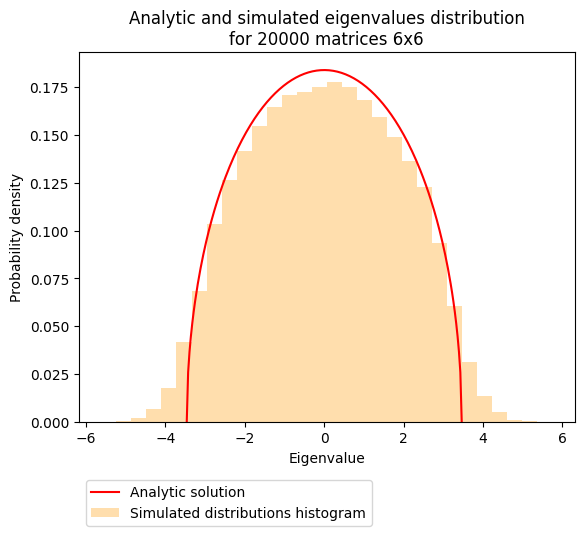

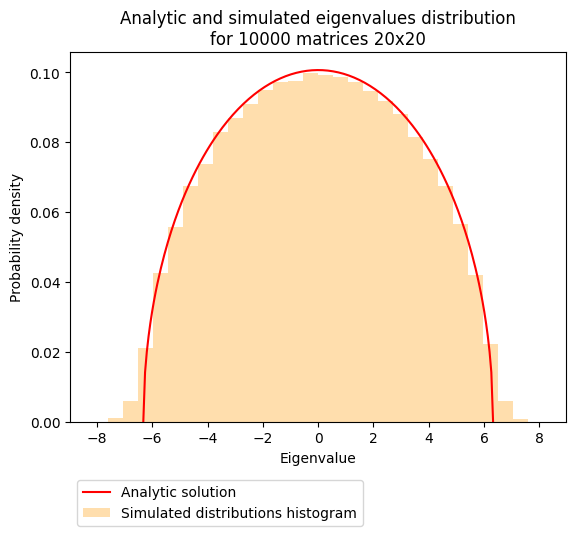

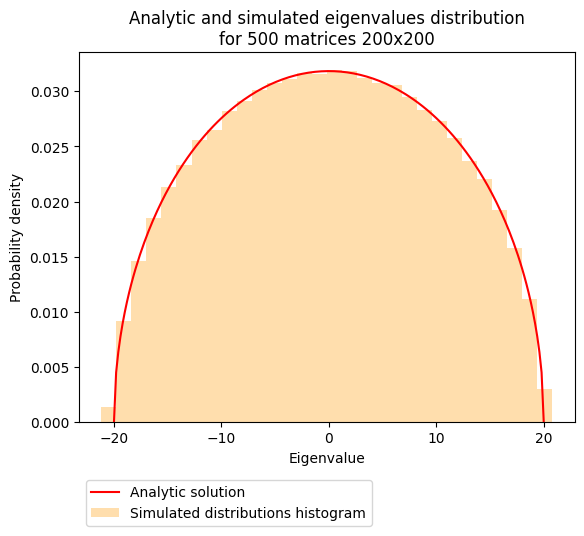

In [5]:
def random_matrix(n):
    '''
    Real symmetric matrix with values out of N(0,1) distributions.
    '''
    output = np.random.randn(n, n)
    return (output + output.T)/2

def scalar(E, N):
    '''
    Wigner distribution of eigenvalues (E) of matrices of size N.
    '''
    R = np.sqrt(2*N)
    return 2 / (np.pi*R**2) * np.sqrt(R*R - E*E)

Wigner = np.vectorize(scalar)

# generate thousand of matrices and put all their eigenvalues to list

for matrices_number, matrix_size in (20000, 6), (10000, 20), (500, 200):

    eigen_values, trash = np.linalg.eig(random_matrix(matrix_size))
    for m in range(matrices_number - 1):

        eigVal, eigVec = np.linalg.eig(random_matrix(matrix_size))
        eigen_values = np.concatenate((eigen_values, eigVal))

    # plot histogram of eigenvalues

    plt.hist(eigen_values, bins = 30, color = "navajowhite", density = True)
    line = np.linspace(start = -np.sqrt(2*matrix_size), stop = np.sqrt(2*matrix_size), num = 200)
    plt.plot(line, Wigner(line, matrix_size), color = "red")
    plt.title("Analytic and simulated eigenvalues distribution\nfor {} matrices {}x{}".format(matrices_number, matrix_size, matrix_size))
    plt.xlabel("Eigenvalue")
    plt.ylabel("Probability density")
    plt.legend(["Analytic solution", "Simulated distributions histogram"], bbox_to_anchor = [0,-0.3], loc = "lower left")
    plt.show()

# Task 2 - energy spacings for GOE

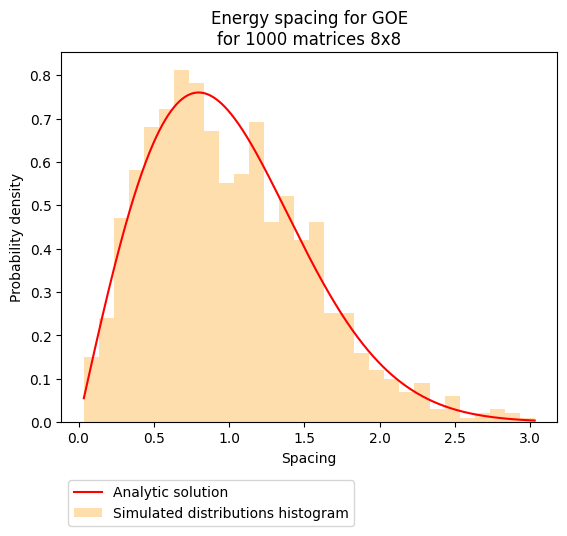

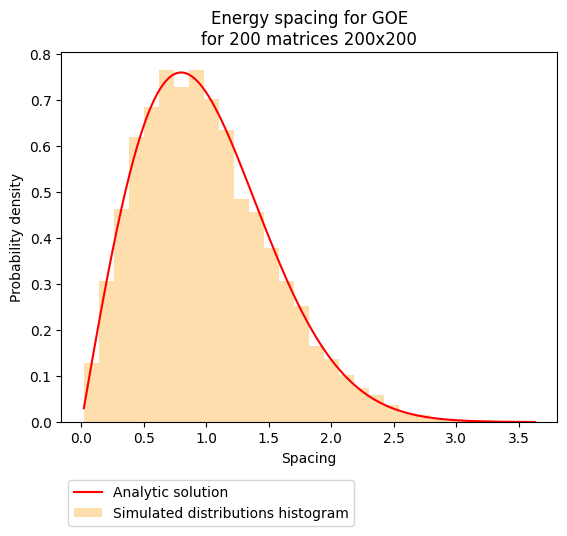

In [21]:
def analyticGOE(s):
    return np.pi / 2 * s * np.exp(-np.pi / 4 * s * s)

analyticGOE = np.vectorize(analyticGOE)

samples_num = 1000
matrix_size = 8

for samples_num, matrix_size in (1000, 8), (200, 200):

    spacing_list = np.array([])

    for i in range(samples_num-1):

        eigVal, eigVec = np.linalg.eig(random_matrix(matrix_size))
        eigVal.sort()

        if matrix_size < 10:
            eigVal = np.array([eigVal[math.floor(len(eigVal) / 2)], eigVal[math.floor(len(eigVal) / 2) + 1]])
        
        else:
            length = len(eigVal)
            eigVal = eigVal[math.floor(3/8*length): math.floor(5/8*length)]

        spacings = np.diff(eigVal)
        spacing_list = np.concatenate([spacing_list, spacings])

    spacing_list /= np.mean(spacing_list)

    plt.hist(spacing_list, color = "navajowhite", bins = 30, density = True)
    line = np.linspace(start = np.min(spacing_list), stop = np.max(spacing_list), num = 1000)
    plt.plot(line, analyticGOE(line), color = "red")
    plt.title("Energy spacing for GOE\nfor {} matrices {}x{}".format(samples_num, matrix_size, matrix_size))
    plt.xlabel("Spacing")
    plt.ylabel("Probability density")
    plt.legend(["Analytic solution", "Simulated distributions histogram"], bbox_to_anchor = [0,-0.3], loc = "lower left")
    plt.show()


# Task 2 - energy spacings for GUE

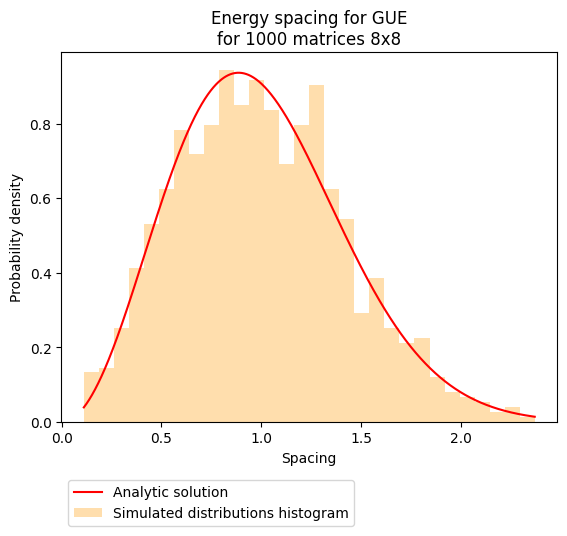

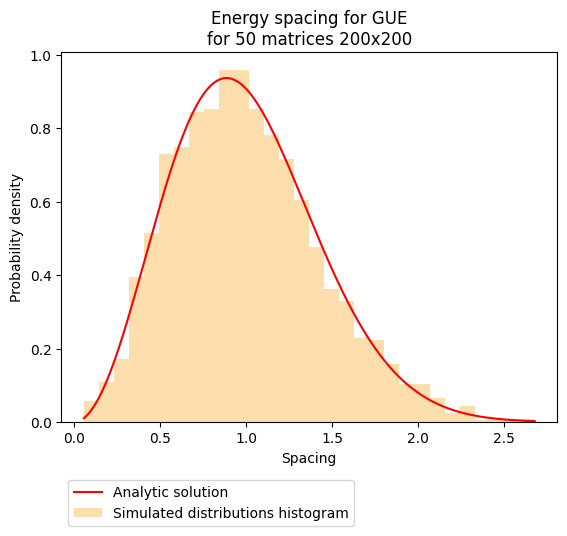

In [22]:
def random_hermit_matrix(n):
    '''
    Hermitian matrix with "random" values.
    '''
    real = np.random.randn(n, n)
    real = real.astype(complex)
    imag = 1j * real.copy()
    output = (real + imag) / np.sqrt(2)
    output = np.matrix(output)
    return (output + output.H) / 2

def analyticGUE(s):
    return 32 / np.pi**2 * s**2 * np.exp(-4 / np.pi  * s * s)

analyticGUE = np.vectorize(analyticGUE)

samples_num = 1000
matrix_size = 8

for samples_num, matrix_size in (1000, 8), (50, 200):

    spacing_list = np.array([])

    for i in range(samples_num-1):

        eigVal, eigVec = np.linalg.eig(random_hermit_matrix(matrix_size))
        eigVal.sort()

        if matrix_size < 10:
            eigVal = np.array([eigVal[math.floor(len(eigVal) / 2)], eigVal[math.floor(len(eigVal) / 2) + 1]])
        
        else:
            length = len(eigVal)
            eigVal = eigVal[math.floor(3/8*length): math.floor(5/8*length)]

        spacings = np.diff(eigVal)
        spacing_list = np.concatenate([spacing_list, spacings])

    spacing_list /= np.mean(spacing_list)

    plt.hist(spacing_list, color = "navajowhite", bins = 30, density = True)
    line = np.linspace(start = np.min(spacing_list), stop = np.max(spacing_list), num = 1000)
    plt.plot(line, analyticGUE(line), color = "red")
    plt.title("Energy spacing for GUE\nfor {} matrices {}x{}".format(samples_num, matrix_size, matrix_size))
    plt.xlabel("Spacing")
    plt.ylabel("Probability density")
    plt.legend(["Analytic solution", "Simulated distributions histogram"], bbox_to_anchor = [0,-0.3], loc = "lower left")
    plt.show()